In [5]:
import healpy as h
import sys  ; sys.path.append("../../codes/")
from modules_v2 import euler as euler
from modules_v2 import rs_rad_ker as rk
from modules_v2 import  convert_qu2eb as qb
from modules_v2 import  convert_eb2qu as bq
from modules_v2 import return_kernels as retker

%pylab notebook
import time

Populating the interactive namespace from numpy and matplotlib


In [6]:
nside=64 ; npix=h.nside2npix(nside) ; omega=(4.*pi/h.nside2npix(nside))
sampling=6000 ; lmax=3*nside ; odisc=min(180.,180.*(24./lmax))
beta0=min(180,180.*32/(3*nside))*pi/180. ; print beta0*180/pi
xsize=400  ; reso=(0.7*odisc*60.)/xsize ; grat=2. ; print reso

theta,pl2=rk.get_plm0(lmax,sampling,theta_max=min(pi,3.*beta0))
rad_ker=rk.calc_qu2eb_rad_ker(lmax,theta,pl2)
rad_ker_i,rad_ker_d=rk.calc_qu2queb_rad_ker(lmax,theta,pl2)

nsideout=512

30.0
2.3625


# Generate a point source TQU and TEB map.

In [30]:
#cpix=10000
#lon,lat=h.pix2ang(nsideout,cpix,lonlat=True)

lon=0. ; lat=0.
cpix=h.ang2pix(nsideout,lon,lat,lonlat=True)
print cpix,h.pix2ang(nsideout,cpix,lonlat=True)

npix=h.nside2npix(nsideout)
t=zeros(npix,float) ; mask=zeros(npix,float)
e=zeros(npix,float) ; b=zeros(npix,float)
q=zeros(npix,float) ; u=zeros(npix,float)

t[cpix]=1. ; mask[cpix]=1.
e[cpix]=0. ; b[cpix]=1.
q[cpix]=0. ; u[cpix]=1.

1569792 (0.0, 0.074603900655176858)


# Maps derived using real space operator 

In [31]:
rteb=qb.convert_qu2eb_radiate(q,u,3.*beta0,theta,rad_ker,mask)
rtqu=bq.convert_eb2qu_radiate(e,b,3.*beta0,theta,rad_ker,mask)

# Radiating kernels

In [32]:
temp,rker_qu2eb=retker.return_qu2eb_kernel_radiate(nsideout,lon,lat,3.*beta0,theta,rad_ker,normalize=True)
temp,rker_eb2qu=retker.return_eb2qu_kernel_radiate(nsideout,lon,lat,3.*beta0,theta,rad_ker,normalize=True)

# Healpix maps

In [33]:
tqu=[t,q,u]
alm_tqu=h.map2alm(tqu,lmax=3*nside,pol=True,iter=0.)
hteb=h.alm2map(alm_tqu,nside=nsideout,pol=False)

teb=[t,e,b]
htqu=h.alm2map(h.map2alm(teb,lmax=3*nside,pol=False),nside=nsideout,pol=True)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


<IPython.core.display.Javascript object>


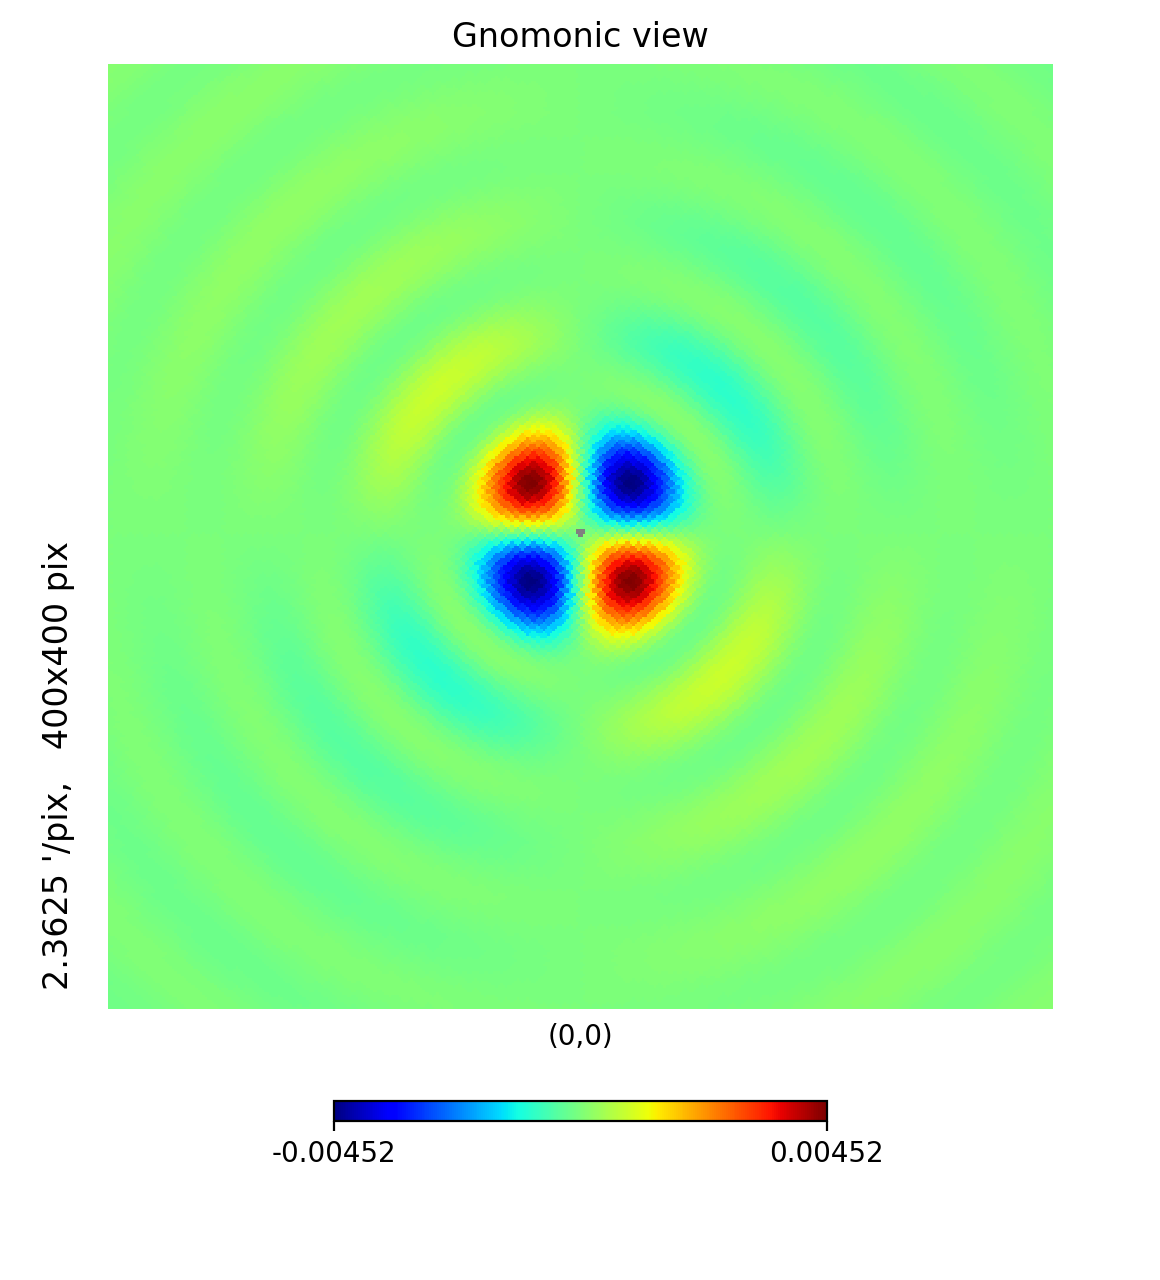

<IPython.core.display.Javascript object>


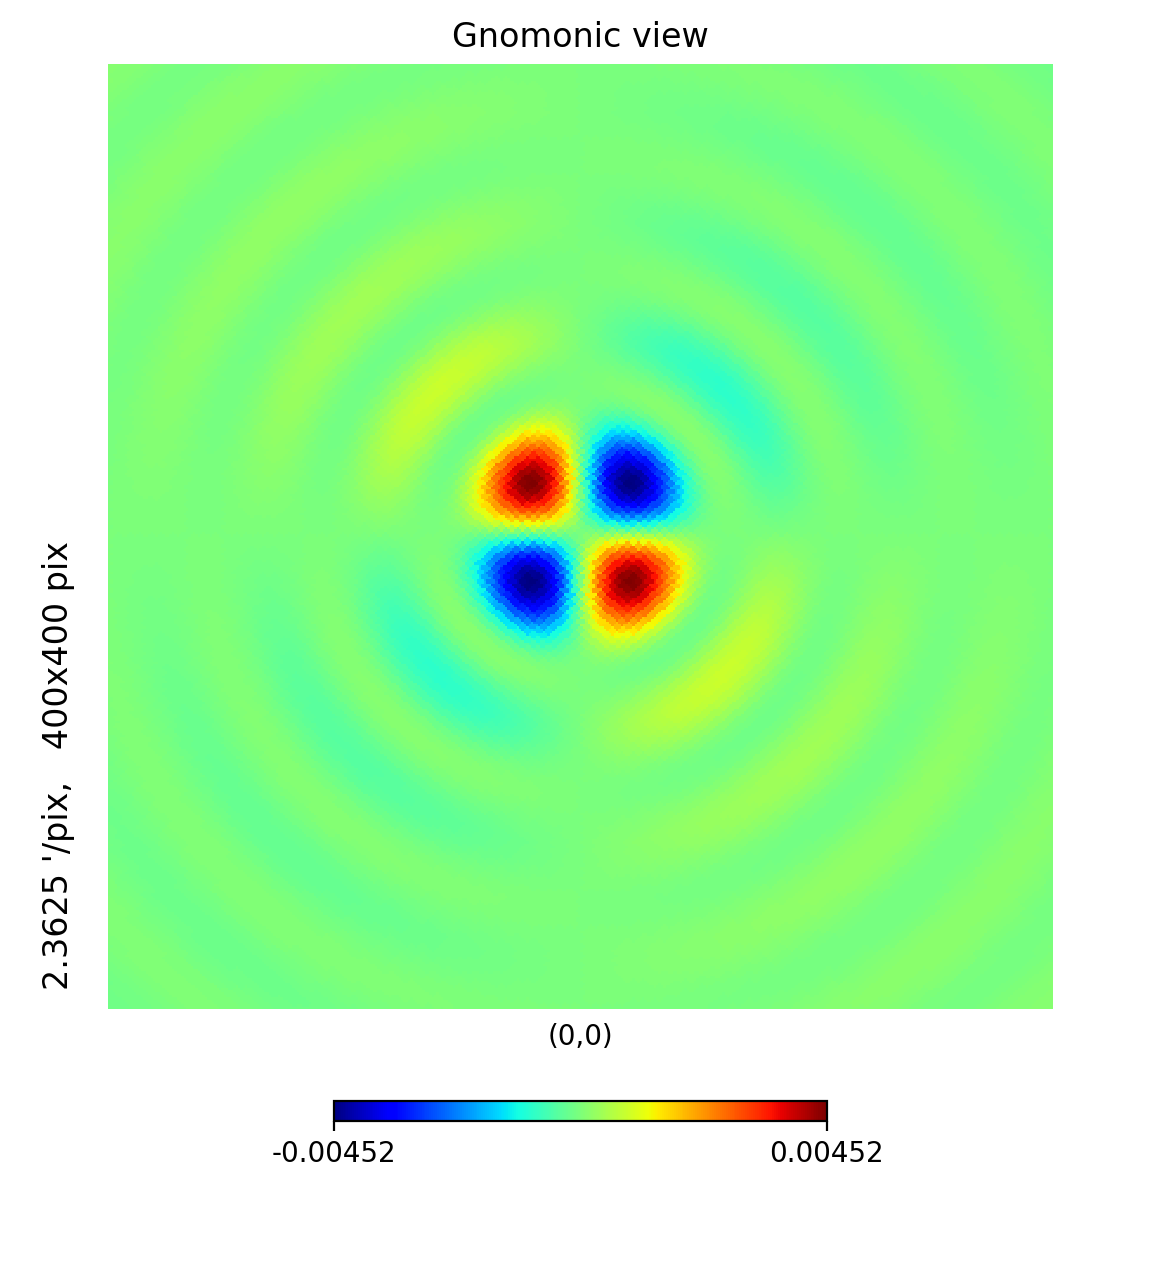

<IPython.core.display.Javascript object>


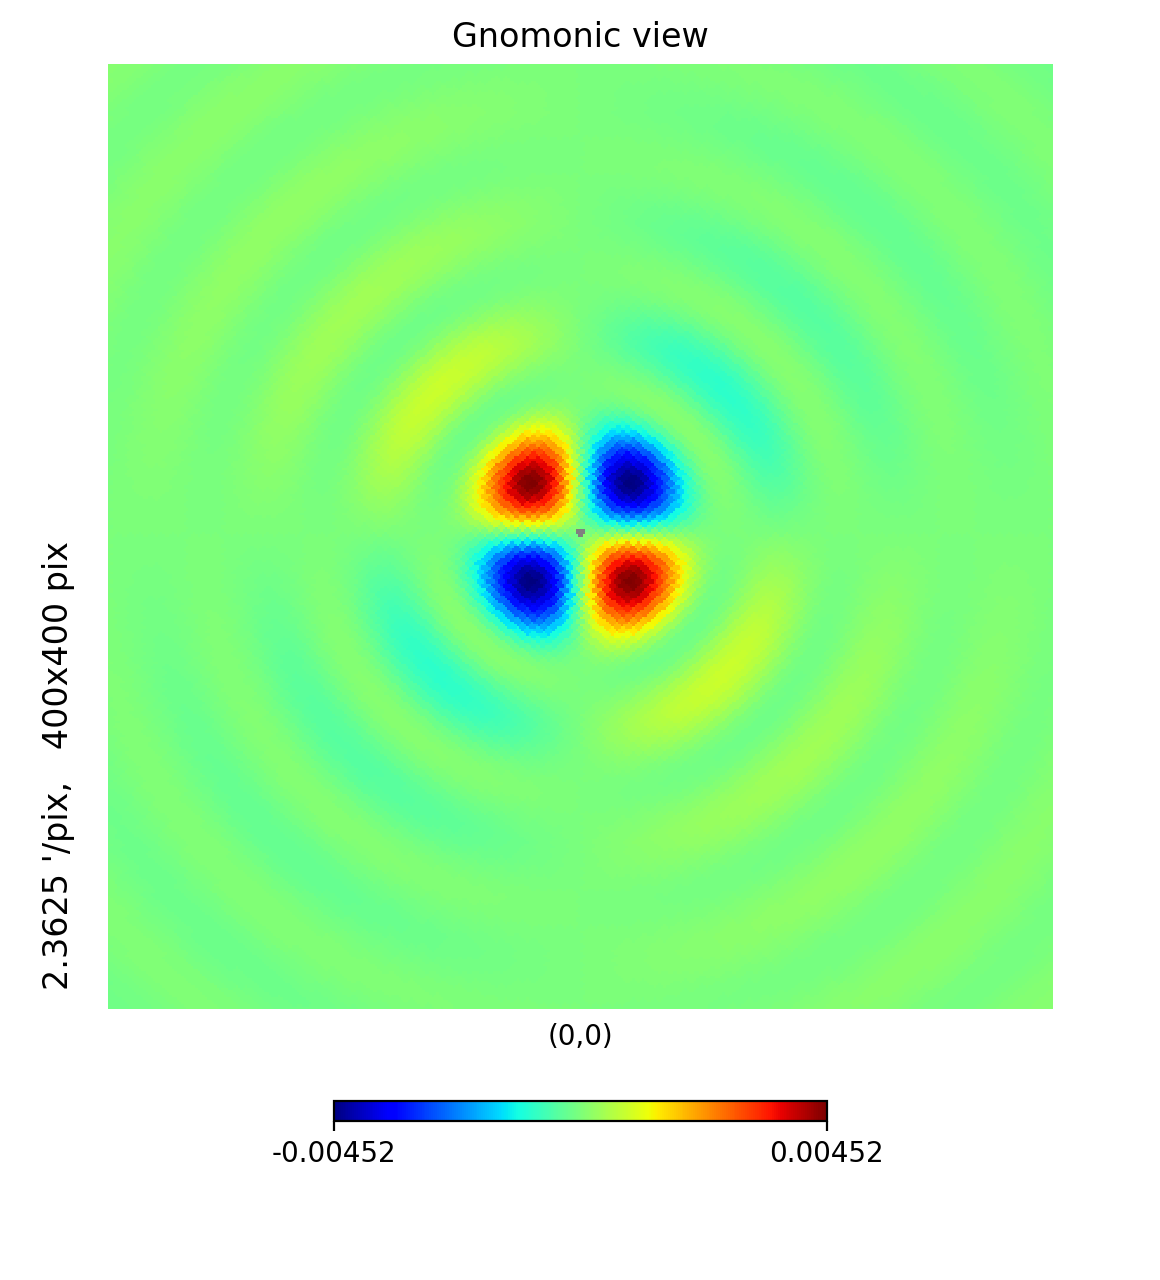

In [25]:
h.gnomview(rteb[1],rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso)
h.gnomview(hteb[1],rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso)
h.gnomview(-rker_qu2eb[1],rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso)

<IPython.core.display.Javascript object>


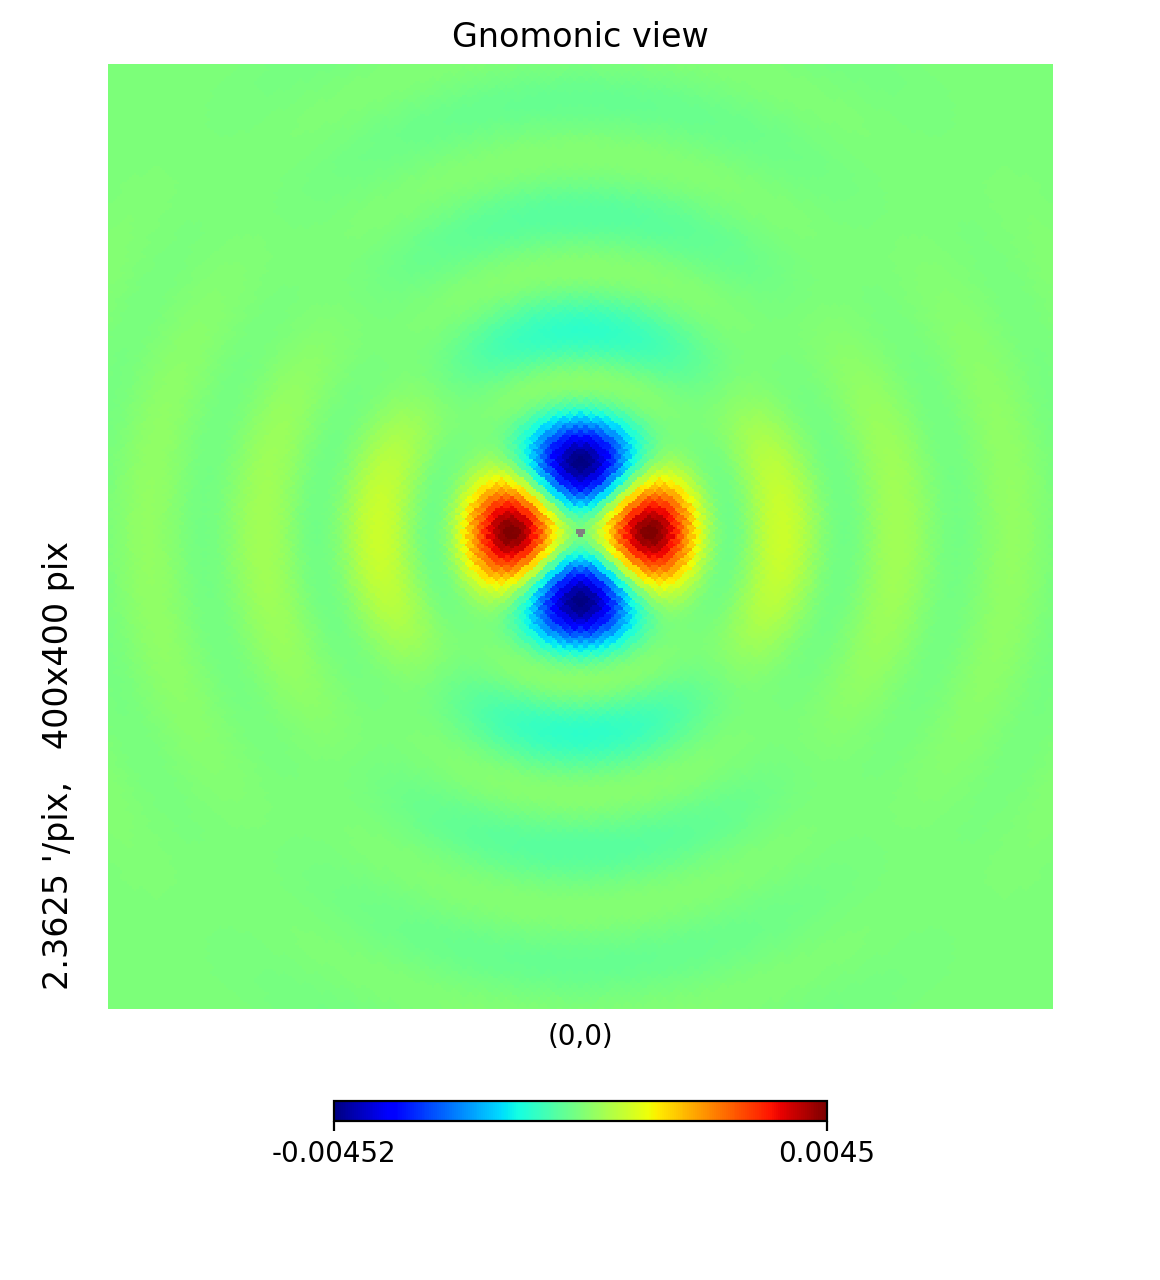

<IPython.core.display.Javascript object>


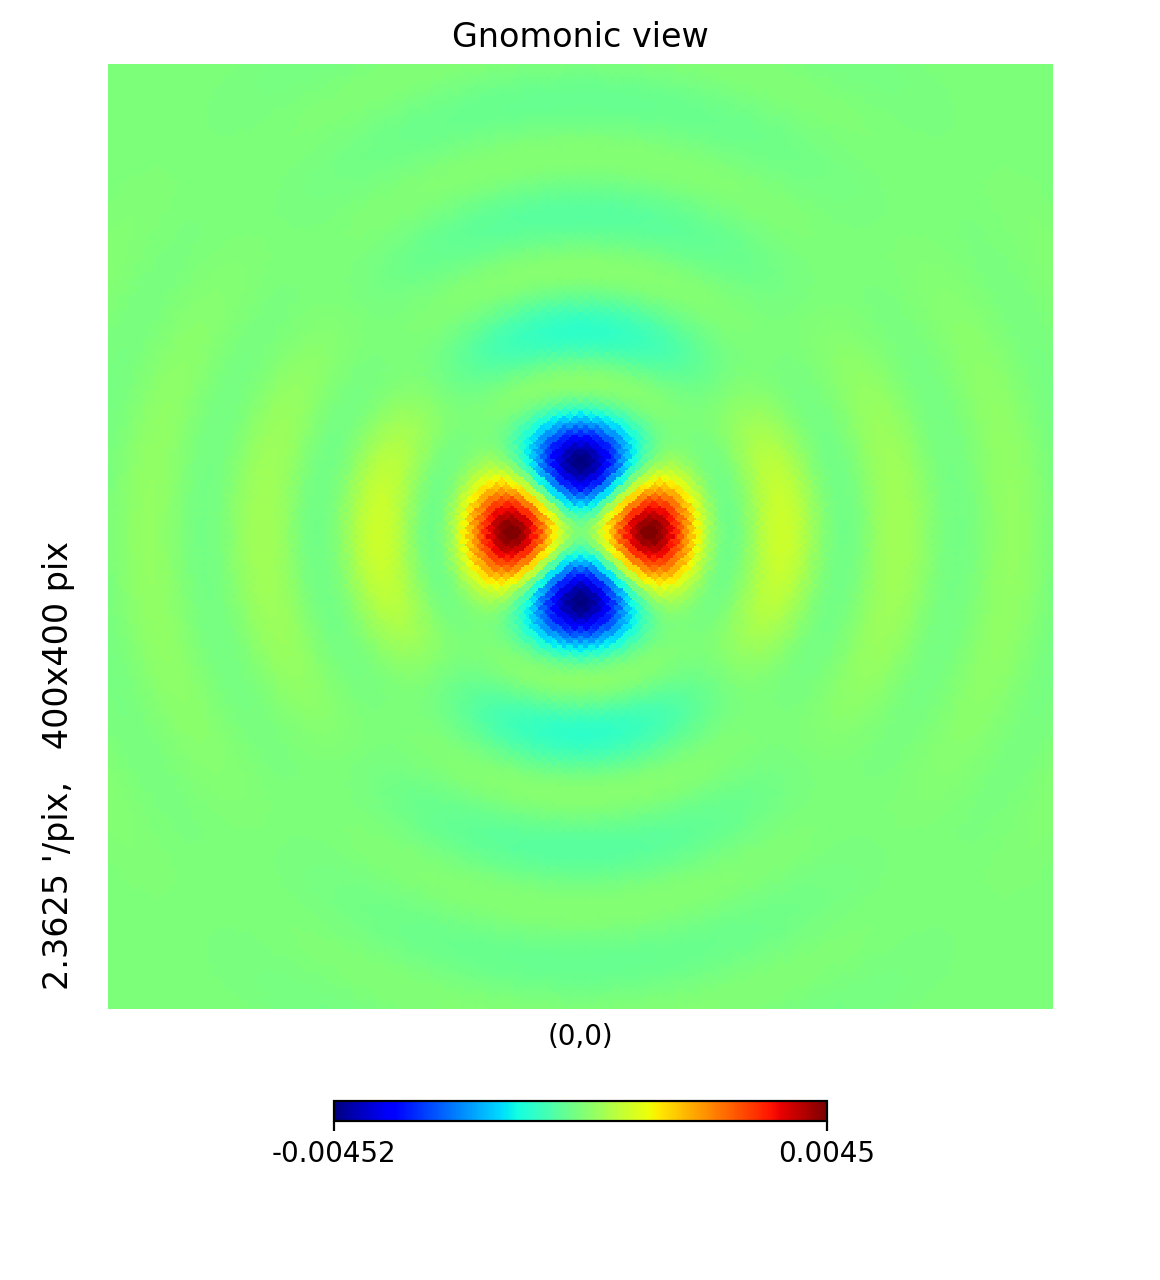

<IPython.core.display.Javascript object>


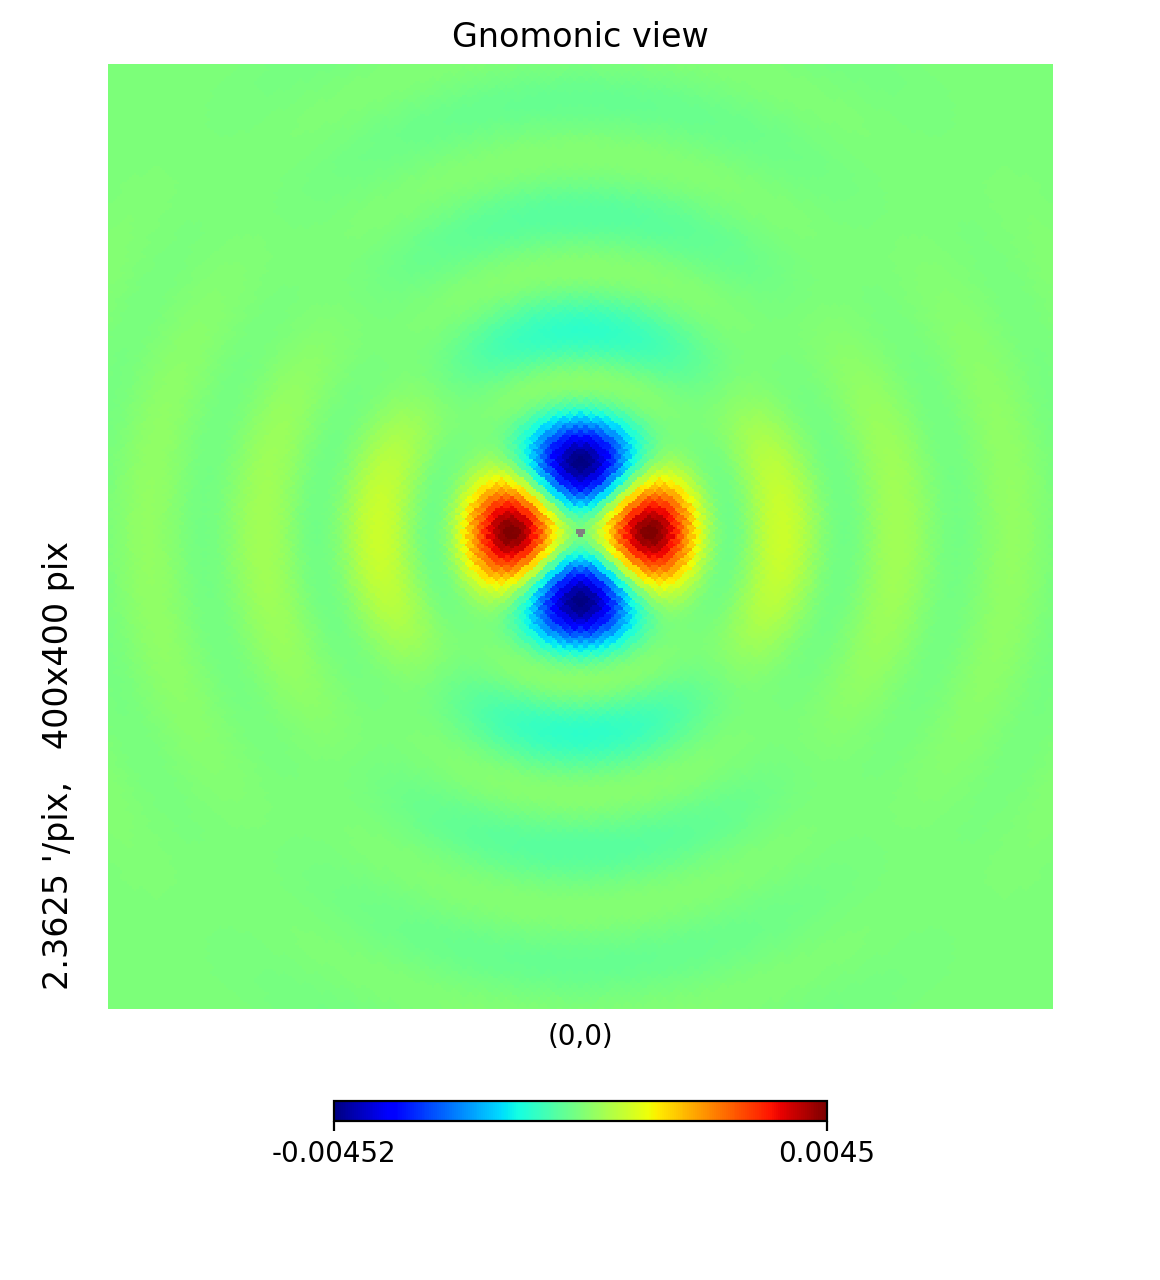

In [26]:
h.gnomview(rteb[2],rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso)
h.gnomview(hteb[2],rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso)
h.gnomview(rker_qu2eb[0],rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso)

<IPython.core.display.Javascript object>


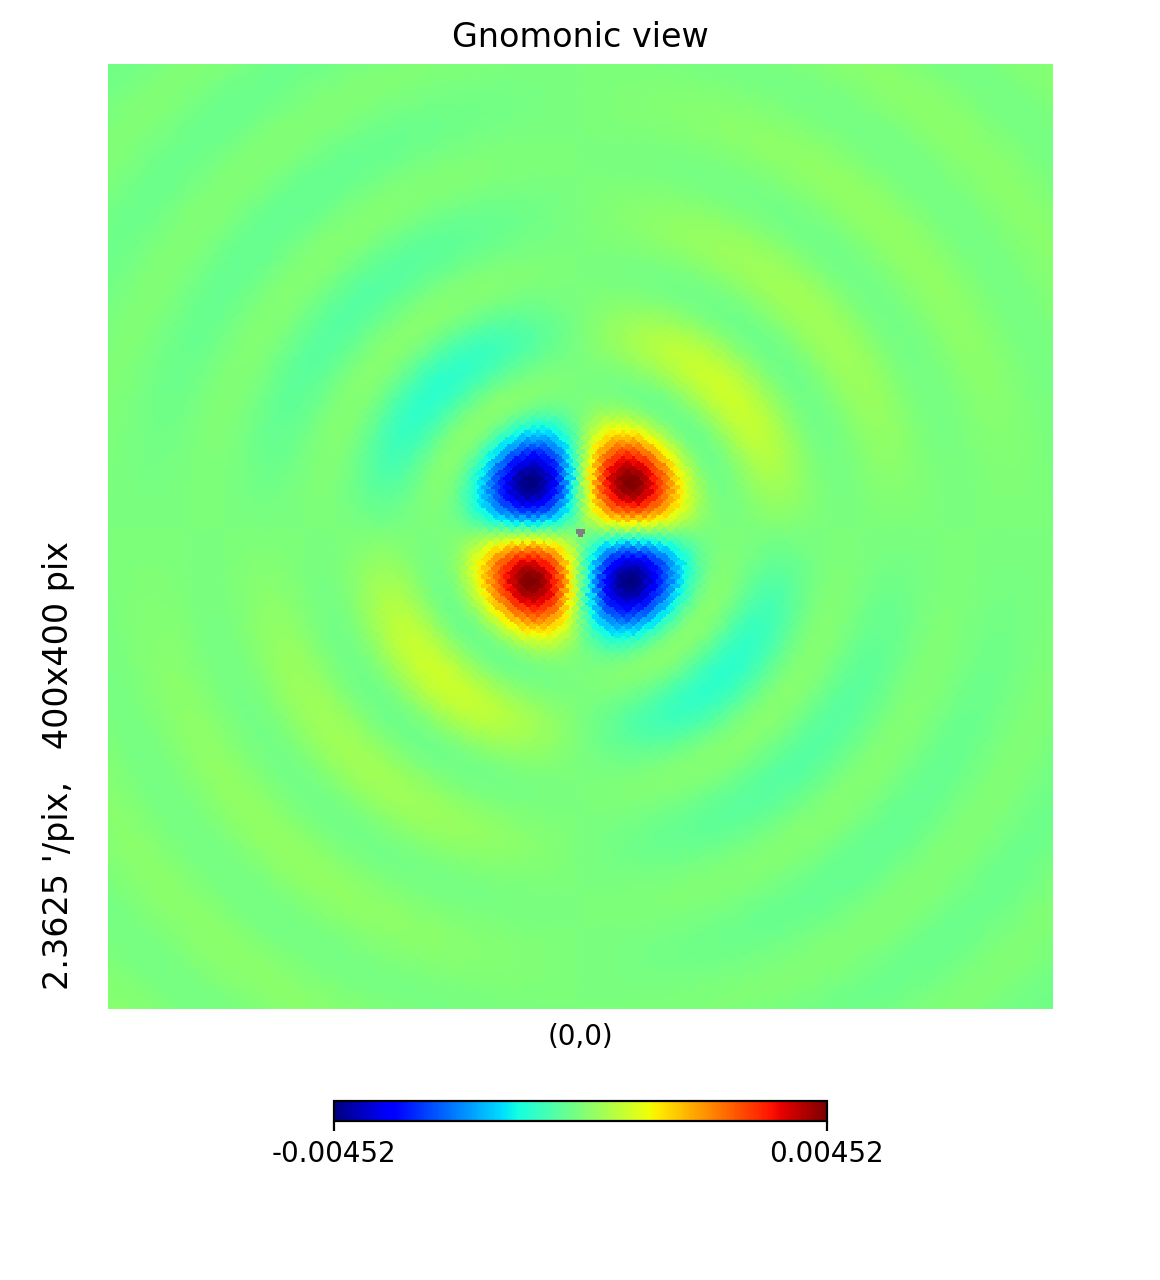

<IPython.core.display.Javascript object>


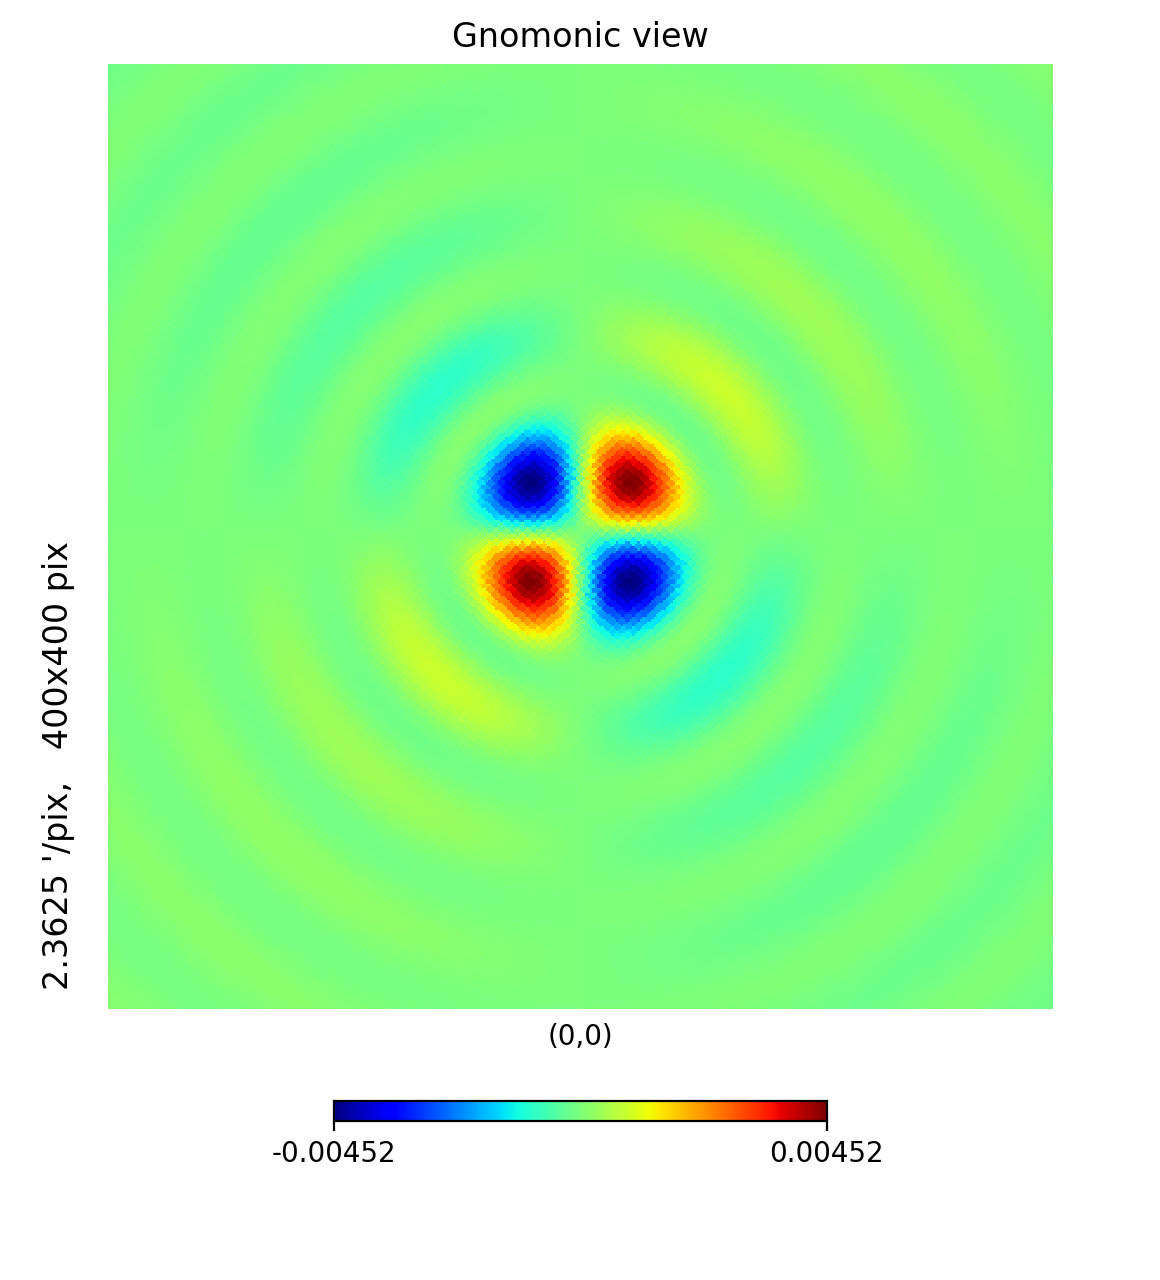

<IPython.core.display.Javascript object>


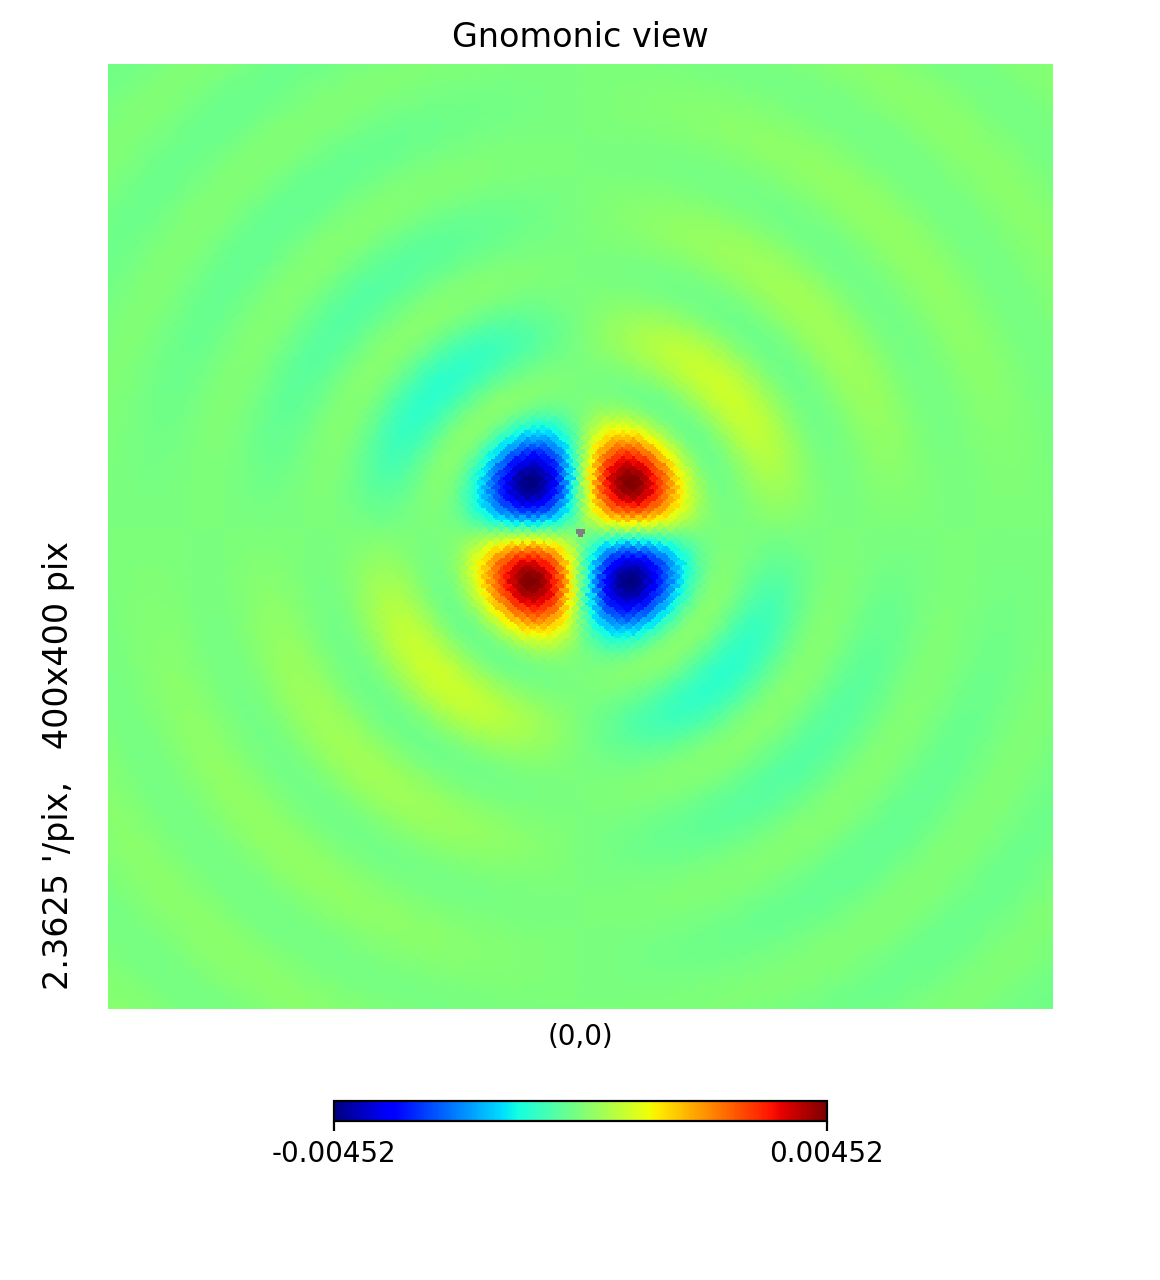

In [35]:
h.gnomview(rtqu[1],rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso)
h.gnomview(htqu[1],rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso)
h.gnomview(-rker_eb2qu[1],rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso)

<IPython.core.display.Javascript object>


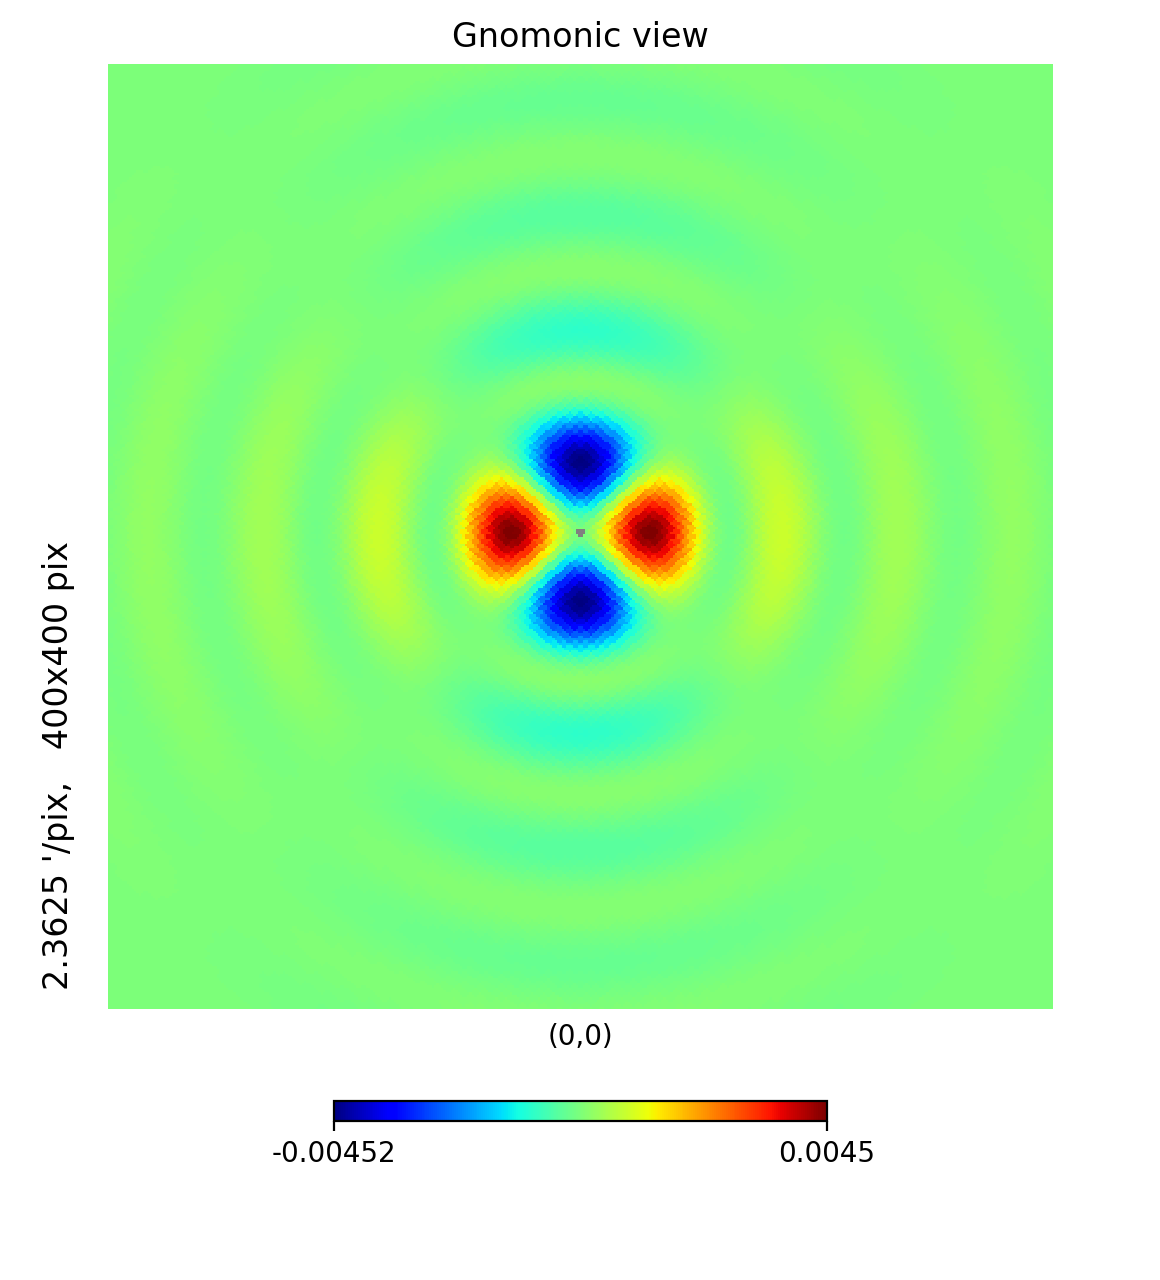

<IPython.core.display.Javascript object>


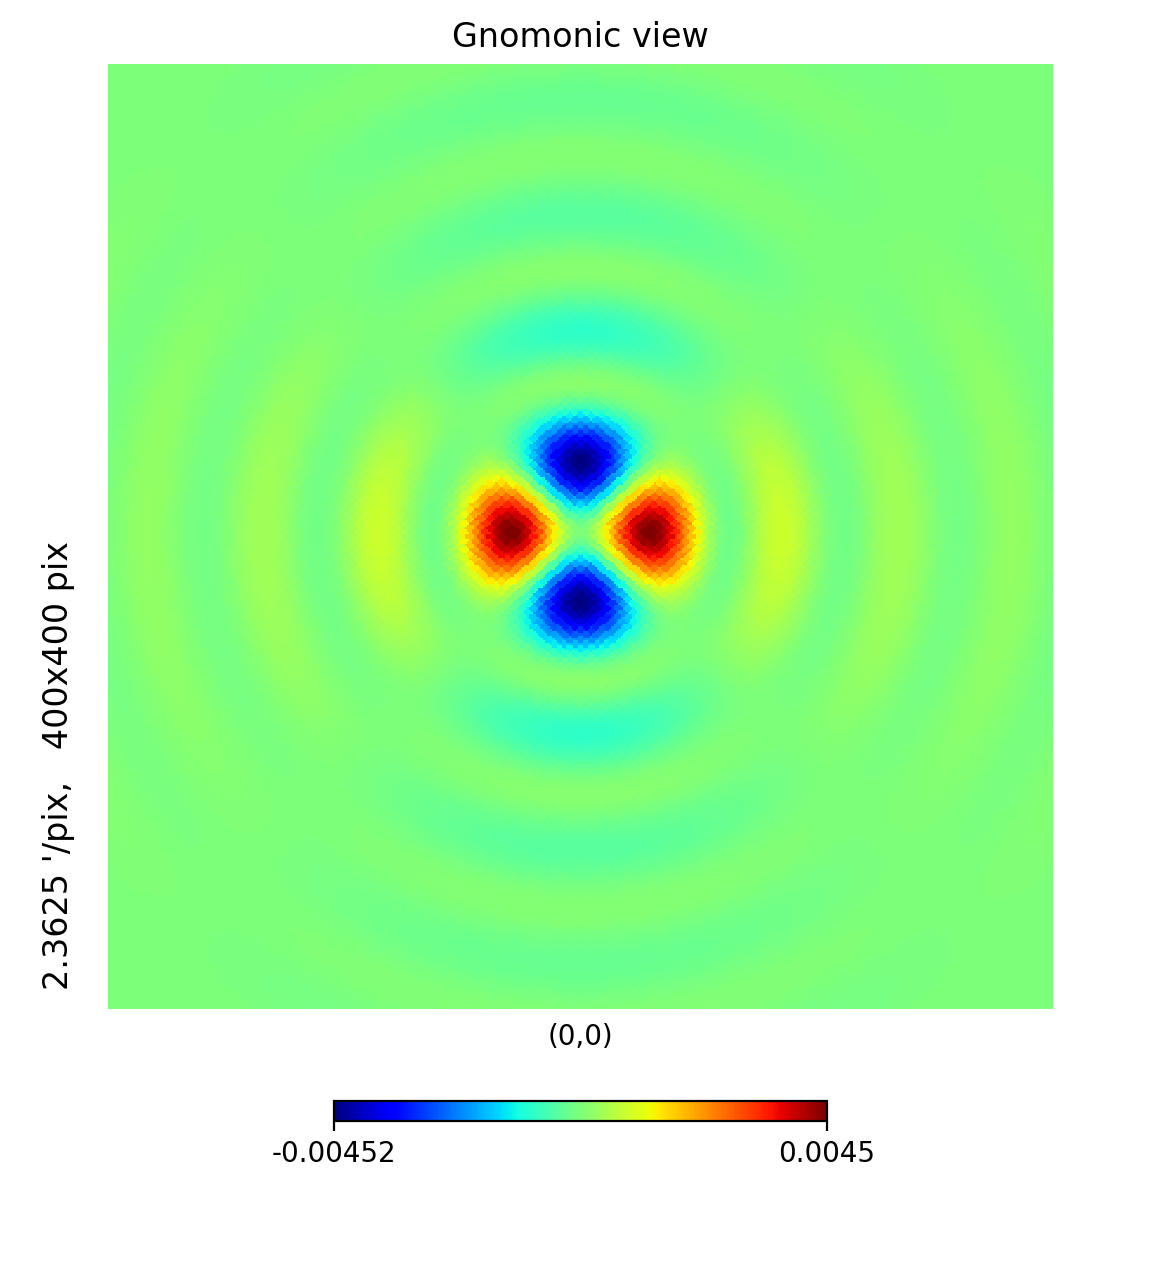

<IPython.core.display.Javascript object>


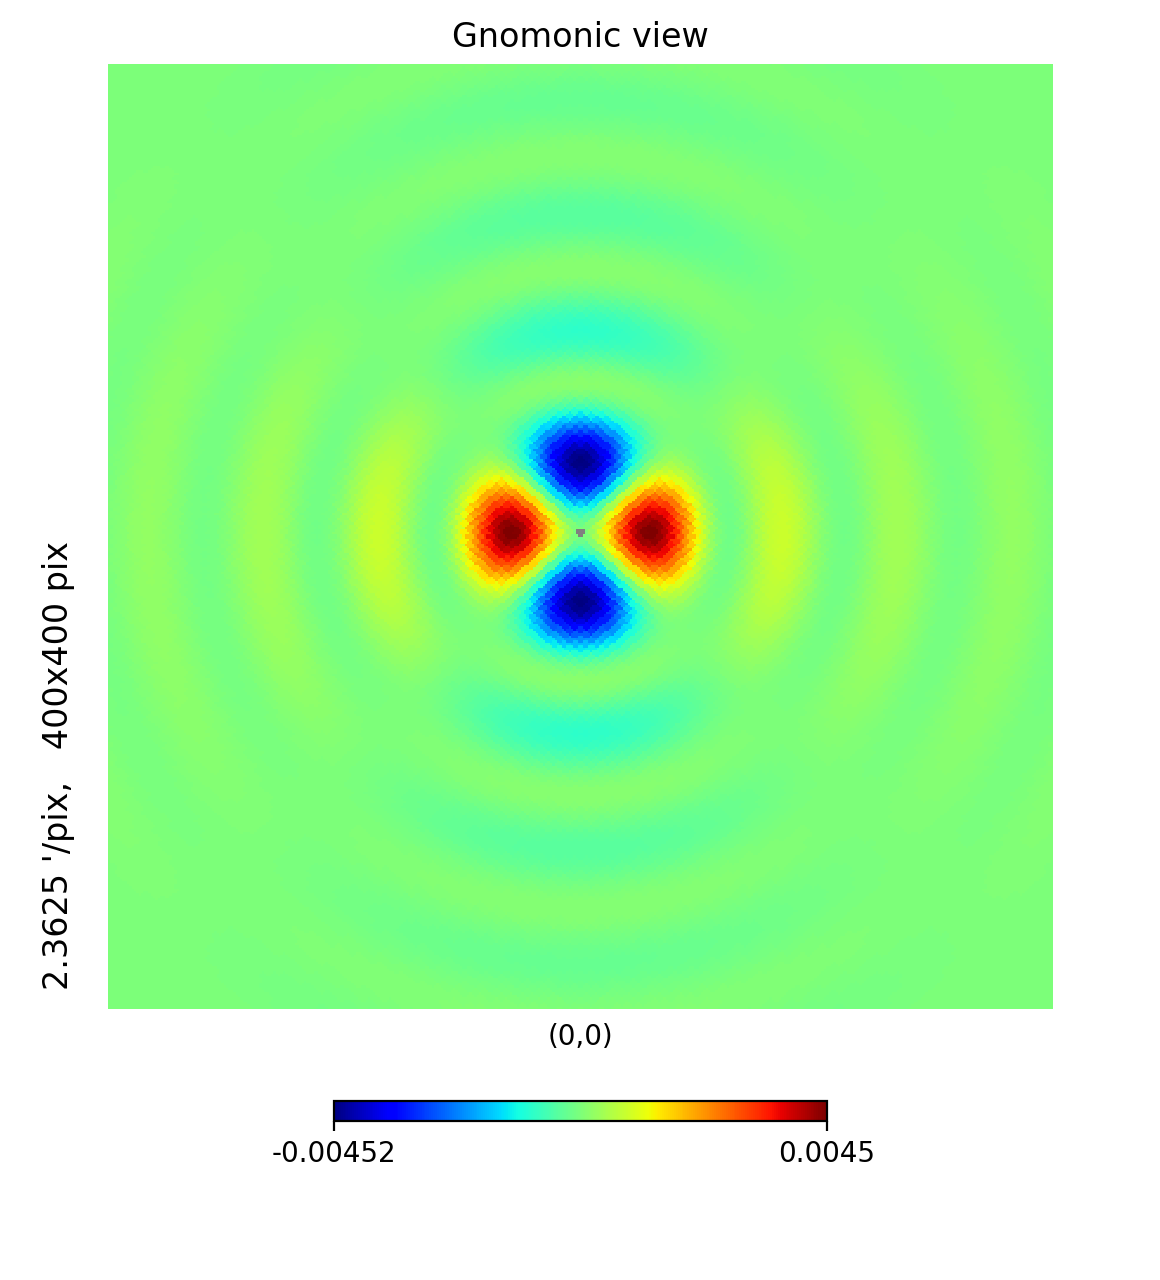

In [36]:
h.gnomview(rtqu[2],rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso)
h.gnomview(htqu[2],rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso)
h.gnomview(rker_eb2qu[0],rot=(lon,lat),xsize=xsize,ysize=xsize,reso=reso)